<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_2_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

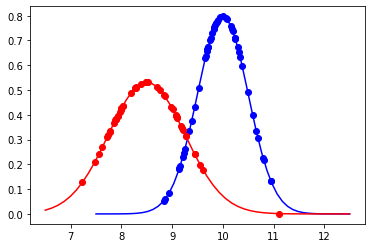

In [2]:
mu_a=10.0
sigma_a=0.5

a=np.random.normal(mu_a,sigma_a,size=50)
data_a=np.zeros(a.size)

for i in np.arange(0,a.size):
  data_a[i]=1/(sigma_a * np.sqrt(2 * np.pi)) *np.exp( - (a[i] - mu_a)**2 / (2 * sigma_a**2))

a_ajuste = np.linspace(7.5,12.5)
ajuste_gaussiano_a = 1/(sigma_a*np.sqrt(2*np.pi))*np.exp(-(a_ajuste-mu_a)**2/(2*sigma_a**2))

mu_b=8.5
sigma_b=0.75

b=np.random.normal(mu_b,sigma_b,size=50)
data_b=np.zeros(b.size)

for i in np.arange(0,a.size):
  data_b[i]=1/(sigma_b * np.sqrt(2 * np.pi)) *np.exp( - (b[i] - mu_b)**2 / (2 * sigma_b**2))

b_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_b = 1/(sigma_b*np.sqrt(2*np.pi))*np.exp(-(b_ajuste-mu_b)**2/(2*sigma_b**2))
umbral=9
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue')
plt.plot(b,data_b,'ro')
plt.plot(b_ajuste,ajuste_gaussiano_b,'red')
plt.show()

Elegir uno de los dos códigos siguientes. El primero varía el umbral desde el menor valor medio al mayor valor medio.

El segundo varía el umbral desde el mínimo valor general al máximo valor general

In [7]:
intervalo_umbrales=int((mu_a-mu_b)*10+1)
vector_umbrales=np.linspace(mu_b,mu_a,num=intervalo_umbrales)
print(vector_umbrales)

sensibilidad=np.zeros(vector_umbrales.size)
presicion=np.zeros(vector_umbrales.size)
exactitud=np.zeros(vector_umbrales.size)
fall_out=np.zeros(vector_umbrales.size)

print(vector_umbrales.size)
i=0

[ 8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10. ]
16


In [224]:
intervalo_umbrales=int((np.amax(a)-np.amin(b))*10+1)
vector_umbrales=np.linspace(np.amin(b),np.amax(a),num=intervalo_umbrales)
print(vector_umbrales)

sensibilidad=np.zeros(vector_umbrales.size)
presicion=np.zeros(vector_umbrales.size)
exactitud=np.zeros(vector_umbrales.size)
fall_out=np.zeros(vector_umbrales.size)

i=1
print(vector_umbrales.size)

[ 6.35500941  6.45681391  6.55861841  6.66042291  6.76222741  6.86403191
  6.96583641  7.0676409   7.1694454   7.2712499   7.3730544   7.4748589
  7.5766634   7.6784679   7.7802724   7.8820769   7.9838814   8.0856859
  8.1874904   8.2892949   8.3910994   8.4929039   8.5947084   8.6965129
  8.7983174   8.9001219   9.0019264   9.10373089  9.20553539  9.30733989
  9.40914439  9.51094889  9.61275339  9.71455789  9.81636239  9.91816689
 10.01997139 10.12177589 10.22358039 10.32538489 10.42718939 10.52899389
 10.63079839 10.73260289 10.83440739 10.93621189 11.03801638 11.13982088
 11.24162538 11.34342988 11.44523438 11.54703888]
52


In [64]:
from numpy import random

p = random.rand()

print(p)

0.32314561709349243


**Considero a como los positivos, y b como los negativos**

Correr este código tantas veces como valores umbrales se tengan.

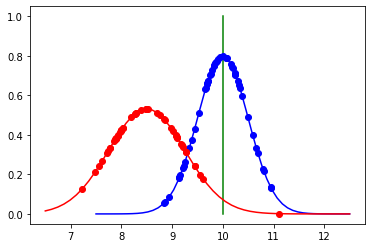

16


In [23]:
umbral=vector_umbrales[i]

#Contadores
tp_count=0    #contador verdaderos positivos
tn_count=0    #contador verdaderos negativos
fp_count=0    #contador falsos positivos  
fn_count=0    #contador falsos negativos

for j in np.arange(0,b.size):
  if b[j]<umbral:
    tn_count=tn_count+1
  if b[j]>umbral:
    fn_count=fn_count+1

for k in np.arange(0,a.size):
  if a[k]<umbral:
    fp_count=fp_count+1
  if a[k]>umbral:
    tp_count=tp_count+1

umbral_grafico=[umbral]*vector_umbrales.size

plt.plot(umbral_grafico,np.linspace(0,1,num=vector_umbrales.size),'green')
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue')
plt.plot(b,data_b,'ro')
plt.plot(b_ajuste,ajuste_gaussiano_b,'red')
plt.show()



#True Positive Rate

sensibilidad[i]=tp_count/(tp_count+fn_count)

#Positive Predicted Value
presicion[i]=tp_count/(tp_count+fp_count)

#Accuracy
exactitud[i]=(tp_count+tn_count)/(tp_count+tn_count+fp_count+fn_count)

#False Positive Rate
fall_out[i]=fp_count/(fp_count+tn_count)

if i<intervalo_umbrales:
  i=i+1
print(i)

Sensibilidad: [0.70422535 0.71428571 0.71428571 0.73529412 0.75       0.75806452
 0.81034483 0.84615385 0.89130435 0.88636364 0.92682927 0.94871795
 0.97058824 0.96551724 0.95833333 0.95238095]
Presicion: [1.   1.   1.   1.   0.96 0.94 0.94 0.88 0.82 0.78 0.76 0.74 0.66 0.56
 0.46 0.4 ]
Exactitud: [0.79 0.8  0.8  0.82 0.82 0.82 0.86 0.86 0.86 0.84 0.85 0.85 0.82 0.77
 0.72 0.69]
Fall_out: [0.         0.         0.         0.         0.05555556 0.07894737
 0.07142857 0.125      0.16666667 0.19642857 0.20338983 0.21311475
 0.25757576 0.30985915 0.35526316 0.37974684]


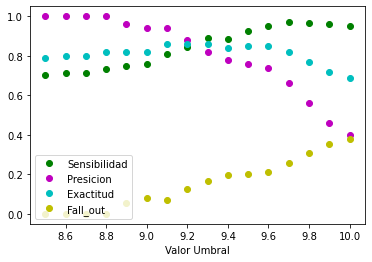

In [24]:
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

plt.plot(vector_umbrales,sensibilidad,'go',label='Sensibilidad')
plt.plot(vector_umbrales,presicion,'mo',label='Presicion')
plt.plot(vector_umbrales,exactitud,'co',label='Exactitud')
plt.plot(vector_umbrales,fall_out,'yo',label='Fall_out')
plt.xlabel('Valor Umbral')
plt.legend(loc='lower left')
plt.show()

Asumiendo los datos de a como los positivos(puntos azules) y b como los negativos(puntos rojos), se observa que, al aumentar el valor umbral la precisión disminuye, lo cual tiene sentido, ya que al aumentar el umbral comienzan a aparecer valores de falsos positivo, y el número de verdaderos positivos y el total de predicciones positivas difieren. 

La Sensibilidad aumenta al aumentar el valor umbral(no en todos los casos entre punto y punto, pero en rasgo general presenta un crecimiento), y esto se debe a que al aumentar el valor umbral el número de falsos negativos disminuye, y los verdaderos positivos se acercan cada vez mas a la condicion de positivo.

La exacitud presenta un valor máximo en un umbral intermedio entre los valores medios de cada distribución. Para estos valores intermedios de umbral, la exactitud se mantiene bastante constante, con el punto medio de estos valores siendo el promedio de los dos valores medios.



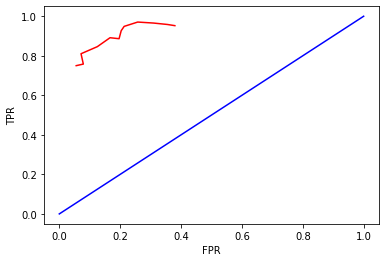

In [25]:
#Curva ROC
x=np.linspace(0,1.0)
y=x

p=0

for j in np.arange(0,fall_out.size):
  if (sensibilidad[j]!=0) and (fall_out[j]!=0):
    p=p+1

sensibilidad2=np.zeros(p)
fall_out2=np.zeros(p)

h=0
for j in np.arange(0,fall_out.size):
  if (sensibilidad[j]!=0) and (fall_out[j]!=0):
    sensibilidad2[h]=sensibilidad[j]
    fall_out2[h]=fall_out[j]
    h=h+1


plt.plot(fall_out2,sensibilidad2,'red',label='Sensibilidad')
plt.plot(x,y,'blue',label='Sensibilidad')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [26]:
max_sensibilidad=np.amax(sensibilidad)
max_exactitud=np.amax(exactitud)

dif=np.absolute(sensibilidad-presicion)

for j in np.arange(0,sensibilidad.size):
  if dif[j]==np.amin(dif):
    umbral_optimo=j
    print(j)
    print(vector_umbrales[j])

7
9.2


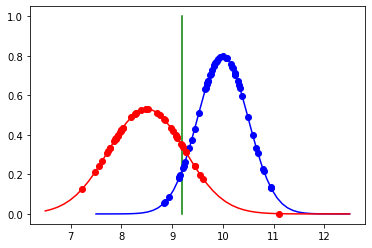

In [27]:
umbral_grafico=[vector_umbrales[umbral_optimo]]*vector_umbrales.size

plt.plot(umbral_grafico,np.linspace(0,1,num=vector_umbrales.size),'green')
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue')
plt.plot(b,data_b,'ro')
plt.plot(b_ajuste,ajuste_gaussiano_b,'red')
plt.show()

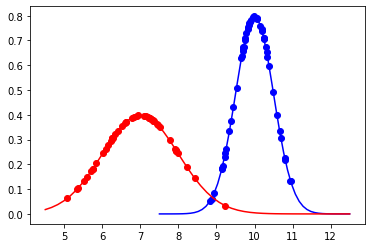

In [28]:
mu_c=7.0
sigma_c=1.0

c=np.random.normal(mu_c,sigma_c,size=50)
data_c=np.zeros(c.size)

for i in np.arange(0,c.size):
  data_c[i]=1/(sigma_c * np.sqrt(2 * np.pi)) *np.exp( - (c[i] - mu_c)**2 / (2 * sigma_c**2))

c_ajuste = np.linspace(4.5,12.5)
ajuste_gaussiano_c = 1/(sigma_c*np.sqrt(2*np.pi))*np.exp(-(c_ajuste-mu_c)**2/(2*sigma_c**2))

plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue')
plt.plot(c,data_c,'ro')
plt.plot(c_ajuste,ajuste_gaussiano_c,'red')
plt.show()

In [29]:
intervalo_umbrales=int((mu_a-mu_c)*10+1)
vector_umbrales=np.linspace(mu_c,mu_a,num=intervalo_umbrales)
print(vector_umbrales)

sensibilidad=np.zeros(vector_umbrales.size)
presicion=np.zeros(vector_umbrales.size)
exactitud=np.zeros(vector_umbrales.size)

i=0
print(vector_umbrales.size)

[ 7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
31


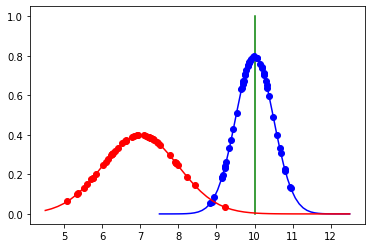

31


In [60]:
umbral=vector_umbrales[i]

#Contadores
tp_count=0    #contador verdaderos positivos
tn_count=0    #contador verdaderos negativos
fp_count=0    #contador falsos positivos  
fn_count=0    #contador falsos negativos

for j in np.arange(0,b.size):
  if c[j]<umbral:
    tn_count=tn_count+1
  if c[j]>umbral:
    fn_count=fn_count+1

for k in np.arange(0,a.size):
  if a[k]<umbral:
    fp_count=fp_count+1
  if a[k]>umbral:
    tp_count=tp_count+1

umbral_grafico=[umbral]*vector_umbrales.size

plt.plot(umbral_grafico,np.linspace(0,1,num=vector_umbrales.size),'green')
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue')
plt.plot(c,data_c,'ro')
plt.plot(c_ajuste,ajuste_gaussiano_c,'red')
plt.show()



#True Positive Rate
sensibilidad[i]=tp_count/(tp_count+fn_count)

#Positive Predicted Value
presicion[i]=tp_count/(tp_count+fp_count)

#Accuracy
exactitud[i]=(tp_count+tn_count)/(tp_count+tn_count+fp_count+fn_count)


if i<intervalo_umbrales:
  i=i+1
print(i)

Sensibilidad: [0.68493151 0.68493151 0.70422535 0.76923077 0.80645161 0.83333333
 0.84745763 0.84745763 0.86206897 0.86206897 0.94339623 0.94339623
 0.94339623 0.96153846 0.96153846 0.98039216 0.98039216 0.98039216
 0.98039216 0.97959184 0.97916667 0.97916667 0.97777778 1.
 1.         1.         1.         1.         1.         1.
 1.        ]
Presicion: [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.96 0.94 0.94 0.88 0.82 0.78 0.76 0.74 0.66
 0.56 0.46 0.4 ]
Exactitud: [0.77 0.77 0.79 0.85 0.88 0.9  0.91 0.91 0.92 0.92 0.97 0.97 0.97 0.98
 0.98 0.99 0.99 0.99 0.99 0.97 0.96 0.96 0.93 0.91 0.89 0.88 0.87 0.83
 0.78 0.73 0.7 ]


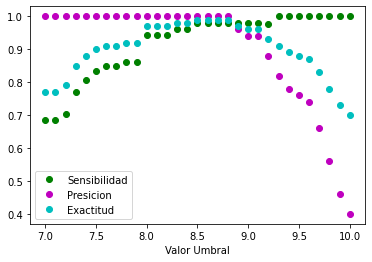

In [61]:
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)

plt.plot(vector_umbrales,sensibilidad,'go',label='Sensibilidad')
plt.plot(vector_umbrales,presicion,'mo',label='Presicion')
plt.plot(vector_umbrales,exactitud,'co',label='Exactitud')
plt.xlabel('Valor Umbral')
plt.legend(loc='lower left')
plt.show()

A comparación del caso anterior, puede verse que hay mas de un umbral "óptimo", ya que hay valores intermedios donde un pequeño cambio en el valor del umbral no afecta el número de verdaderos positivos, falsos positivos, verdaderos negativos, ni falsos negativos de manera considerable.